# Unsupervised Learning models
___
Importing necessary files

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Scikit-learn features various classification, regression and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

In [3]:
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

Reading file into a dataframe

In [4]:
df = pd.read_csv('dataset.csv')

### Step 1. Preprocessing the data

In [5]:
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.size

161100

In [7]:
print('Shape of the data set: ' + str(df.shape))

Shape of the data set: (8950, 18)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
# check for missing values
missing_values = df.isnull().sum()

# print the number of missing values of each variable
print(missing_values)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


There are 2 columns with missing values

In [10]:
df.MINIMUM_PAYMENTS  = df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mean()) 
df.CREDIT_LIMIT      = df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mean())

Temp = pd.DataFrame(df.isnull().sum())
Temp.columns = ['Sum']
print('Total columns with missing values: ' + str(len(Temp.index[Temp['Sum'] > 0])) )

Total columns with missing values: 0


In [11]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

We have to delete CUST_ID column as it contains object values

Alternate solution : We can use it as our new index

Syntax : df.set_index('CUST_ID',inplace=True)

In [12]:
# Action on unnecessary columns
df.drop(['CUST_ID'], axis = 1,inplace = True)
df_attr=df.iloc[:,0:17]

In [13]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

**Checking correlation among features**

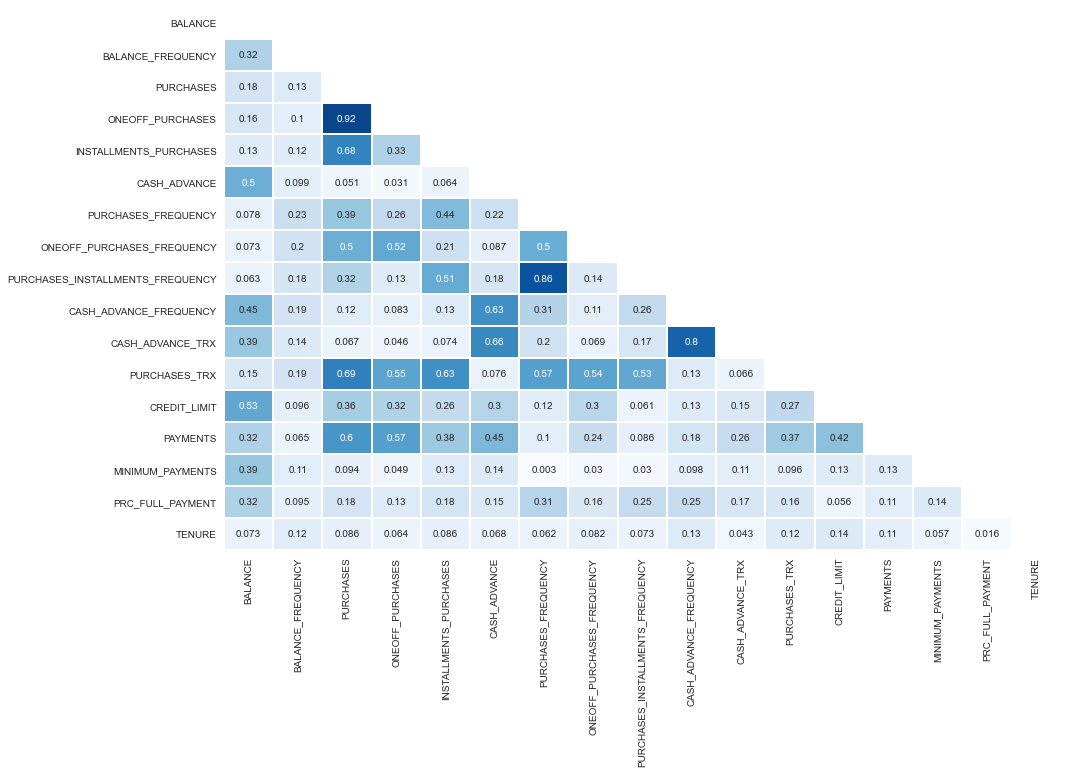

In [14]:
def correlation_plot(df):
    
    corr = abs(df.corr()) # correlation matrix
    lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
    mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

    plt.figure(figsize = (15,10))  # setting the figure size
    sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
    sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', xticklabels = corr.index,
                yticklabels = corr.columns,cbar = False, annot= True, linewidths= 1, mask = mask)   # Da Heatmap
    plt.show()
    
correlation_plot(df)

Note: 'OneOff_Purchases' is highly correlated with 'Purchases' column.

Followed by 'PURCHASES_INSTALLMENTS_FREQUENCY' - 'PURCHASES_FREQUENCY' and 'CASH_ADVANCE_TRX' - 'CASH_ADVANCE_FREQUENCY' column pairs

Balance has a higher level of correlation with Cash Advance, Cash Advance Frequency and Credit Limit. Payments variable has a high correletion with Purchases and one off Purchases. Tenure has a negative correlation with Cash Advance and Cash Advance Frequency variables

**Checking distribution of features**

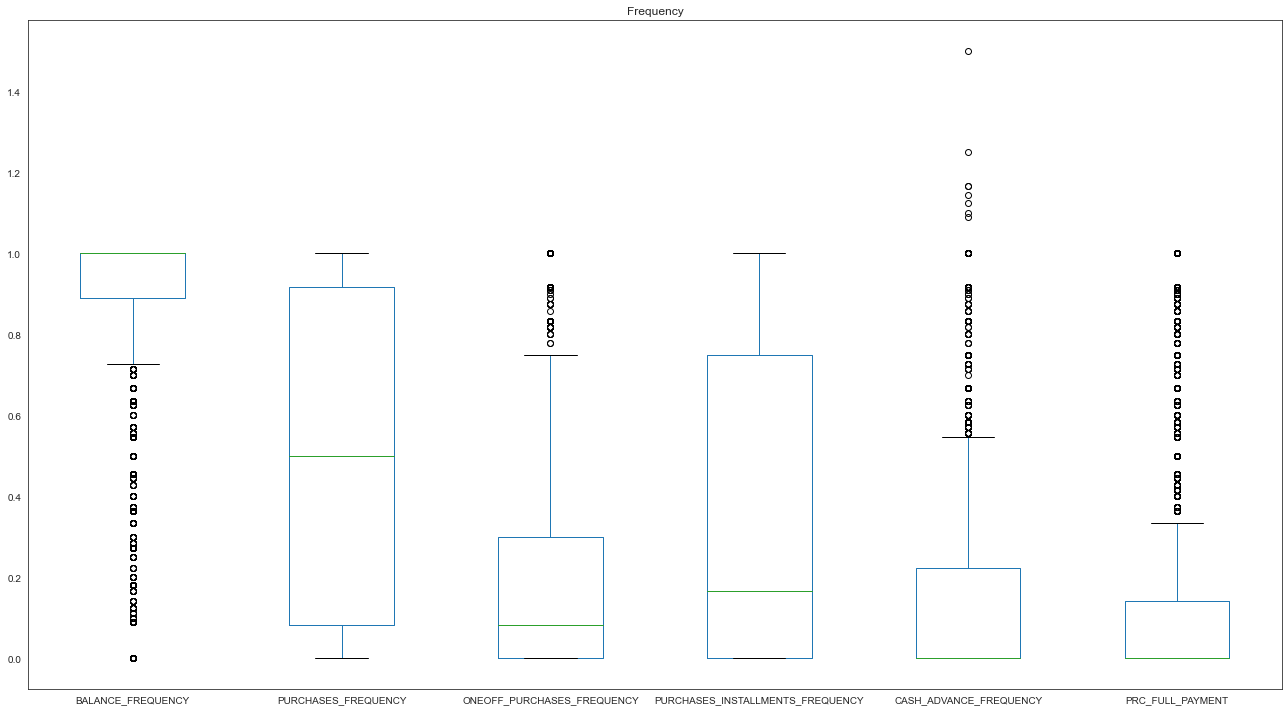

In [15]:
df[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']].plot.box(figsize=(18,10),title='Frequency',legend=True);
plt.tight_layout()

C:\Users\ybhat\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


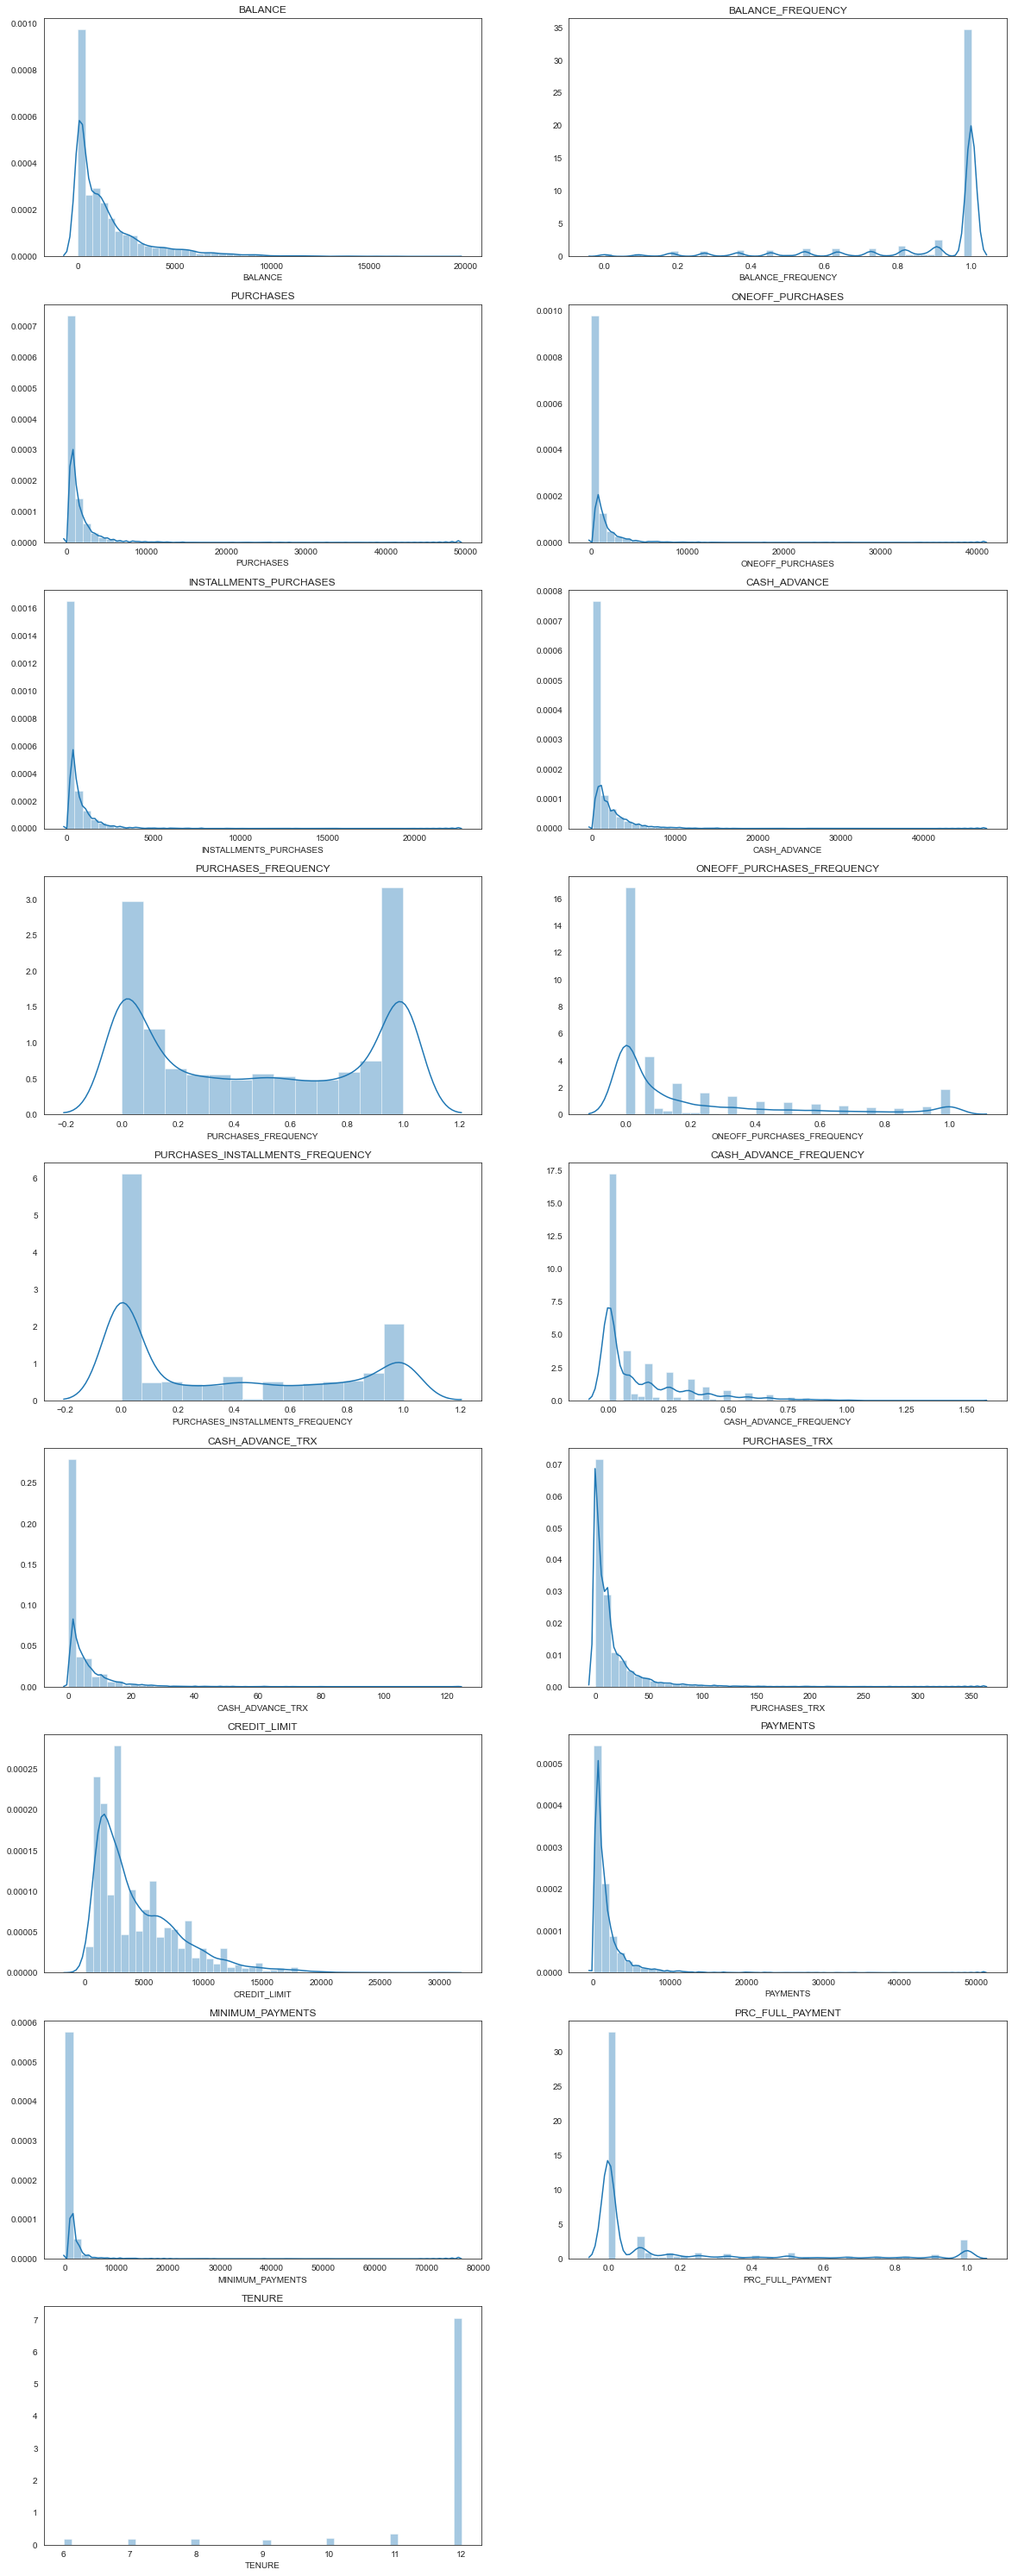

In [16]:
pos=1
plt.figure(figsize=(20,60))
for column in ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','TENURE']:
    
    plt.subplot(10,2,pos)
    series_added=pd.Series(df[column] )
    sns.distplot(series_added)
    plt.title(column)
    pos+=1
    
plt.show()

Skewness in almost every column was found due to presence of extreme values

**Standardizing the data**

In [17]:
#Before scaling
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [18]:
# scaling the data
scaler = StandardScaler()
df = scaler.fit_transform(df) 

In [19]:
df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

### Step 2. Building a k-means algorithm for clustering credit card data 

**Building k means model on various k values and plotting the inertia against various k values**

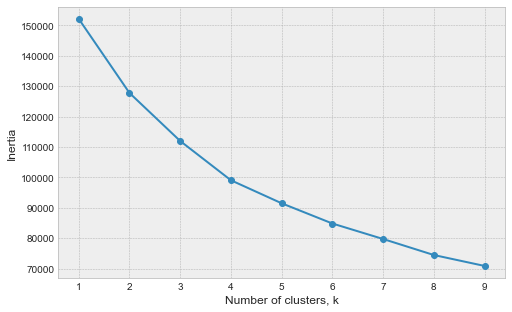

In [20]:
ks = range(1, 10)
inertias = [] # initializing an empty array

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

**Evaluating the model using Silhouette coefficient**

In [21]:
def km(cluster):
    kmeans_values=[]
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(df)
    return kmeans
k = [2, 3, 4, 5, 6,7,8,9,10] 
for i in k:
    sil_score = metrics.silhouette_score(df,km(i), metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(i, metrics.silhouette_score(df, km(i), metric='euclidean')))

Silhouette score for 2 cluster k-means: 0.209
Silhouette score for 3 cluster k-means: 0.251
Silhouette score for 4 cluster k-means: 0.198
Silhouette score for 5 cluster k-means: 0.190
Silhouette score for 6 cluster k-means: 0.196
Silhouette score for 7 cluster k-means: 0.214
Silhouette score for 8 cluster k-means: 0.201
Silhouette score for 9 cluster k-means: 0.215
Silhouette score for 10 cluster k-means: 0.220


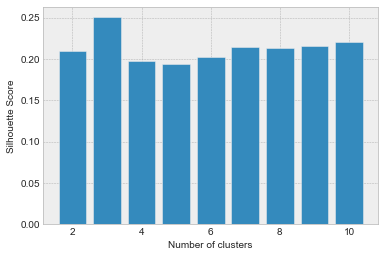

In [22]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(df, KMeans(n_clusters = n_cluster).fit_predict(df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

**Plotting an elbow plot to find the optimal value of k**

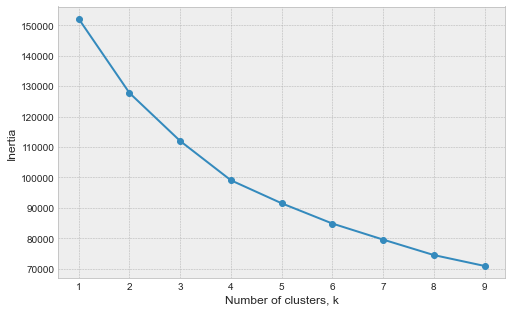

In [23]:
ks = range(1, 10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertias.append(model.inertia_)
plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

***Which k value gives the best result?***

Ans: It is evident from the above graph, that after the Number of clusters crosses 4, the decrease in steepness of inertia is not as much, hence we can take K = 4.

**Another approach to above questions:**

Function k_means applies k-means clustering algorithm on dataset and prints the crosstab of cluster and actual labels 
and clustering performance parameters.
    
Input:

n_clust - number of clusters (k value)

data_frame - dataset we want to cluster

true_labels - original labels
    
Output:

1 - crosstab of cluster and actual labels

2 - performance table   

In [24]:
ks = range(1, 10)
inertias = [] # initializing an empty array

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertias.append(model.inertia_)
    
def k_means(n_clust, data_frame, true_labels):

    k_means = KMeans(n_clusters = n_clust, random_state=123, n_init=30)
    k_means.fit(data_frame)
    c_labels = k_means.labels_
    df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
    ct = pd.crosstab(df['clust_label'], df['orig_label'])
    y_clust = k_means.predict(data_frame)
    display(ct)
    print('% 9s' % 'inertia  homo    compl   v-meas   ARI     AMI     silhouette')
    print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
    %(k_means.inertia_, homogeneity_score(true_labels, y_clust),completeness_score(true_labels, y_clust),
      v_measure_score(true_labels, y_clust), adjusted_rand_score(true_labels, y_clust), 
      adjusted_mutual_info_score(true_labels, y_clust), silhouette_score(data_frame, y_clust, metric='euclidean')))

In [25]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='average')
model.fit(df_attr)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [26]:
df_attr['labels'] = model.labels_
df_attr.groupby(["labels"]).count()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
labels,,,,,,,,,,,,,,,,,
0,8909,8909,8909,8909,8909,8909,8909,8909,8909,8909,8909,8909,8909,8909,8909,8909,8909
1,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
2,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [27]:
Labels=df_attr["labels"]
k_means(n_clust=2, data_frame=df, true_labels=Labels)

orig_label,0,1,2,3,4,5
clust_label,,,,,,
0,5225,0,11,0,0,1
1,3684,21,5,1,2,0


inertia  homo    compl   v-meas   ARI     AMI     silhouette
127784   0.072   0.004   0.007   0.002   0.006    0.210


### Step 3. Applying PCA to the dataset

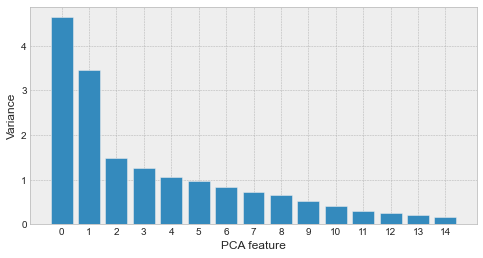

In [28]:
pca = PCA(random_state=123)
pca.fit(df)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15])
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

In [29]:
def pca_transform(n_comp):
    pca = PCA(n_components=n_comp, random_state=123)
    global Df_reduced
    Df_reduced = pca.fit_transform(df)
    print('Shape of the new Data df: ' + str(Df_reduced.shape))

In [30]:
pca_transform(n_comp=1)
def kmeans(cluster):
    kmeans_values=[]
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(Df_reduced)
    return kmeans
k = [2, 3, 4, 5, 6,7,8,9,10] 
for i in k:
    sil_score = metrics.silhouette_score(Df_reduced,kmeans(i), metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(i, metrics.silhouette_score(Df_reduced, kmeans(i), metric='euclidean')))


Shape of the new Data df: (8950, 1)
Silhouette score for 2 cluster k-means: 0.649
Silhouette score for 3 cluster k-means: 0.590
Silhouette score for 4 cluster k-means: 0.597
Silhouette score for 5 cluster k-means: 0.596
Silhouette score for 6 cluster k-means: 0.569
Silhouette score for 7 cluster k-means: 0.558
Silhouette score for 8 cluster k-means: 0.559
Silhouette score for 9 cluster k-means: 0.550
Silhouette score for 10 cluster k-means: 0.547


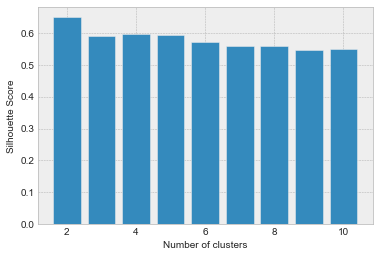

In [31]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(Df_reduced, KMeans(n_clusters = n_cluster).fit_predict(Df_reduced))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

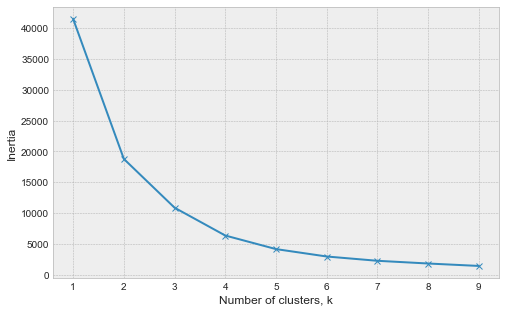

In [32]:
ks = range(1, 10)
inertias = [] 

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(Df_reduced)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.plot(ks, inertias, '-x')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

***Optimum Value of K after PCA is: 2***

_______
#### We transform the features with PCA along with n_component as 1 and use K means algorithm again

In [33]:
pca_transform(n_comp=1)
k_means(n_clust=2, data_frame=Df_reduced, true_labels=Labels)

Shape of the new Data df: (8950, 1)


orig_label,0,1,2,3,4,5
clust_label,,,,,,
0,7321,0,4,0,0,0
1,1588,21,12,1,2,1


inertia  homo    compl   v-meas   ARI     AMI     silhouette
18771   0.182   0.013   0.024   0.028   0.023    0.649


### Step 4. Creating a new column as a cluster label in the original data frame and performing cluster analysis

In [34]:
Data_clusters = df_attr.groupby(['labels'])
print(Data_clusters)

In [35]:
#To create a pandas dataframegroupby object -- 8949 is for all entries
Data_groups=Data_clusters.head(8949)

In [36]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.stats import zscore
from scipy.spatial.distance import pdist

Case 1: Cluster-1 -- Average

In [37]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_1 = linkage(df_attr, 'average')
c_val, coph_dists = cophenet(Z_1 , pdist(df_attr))

c_val

0.9210151375394977

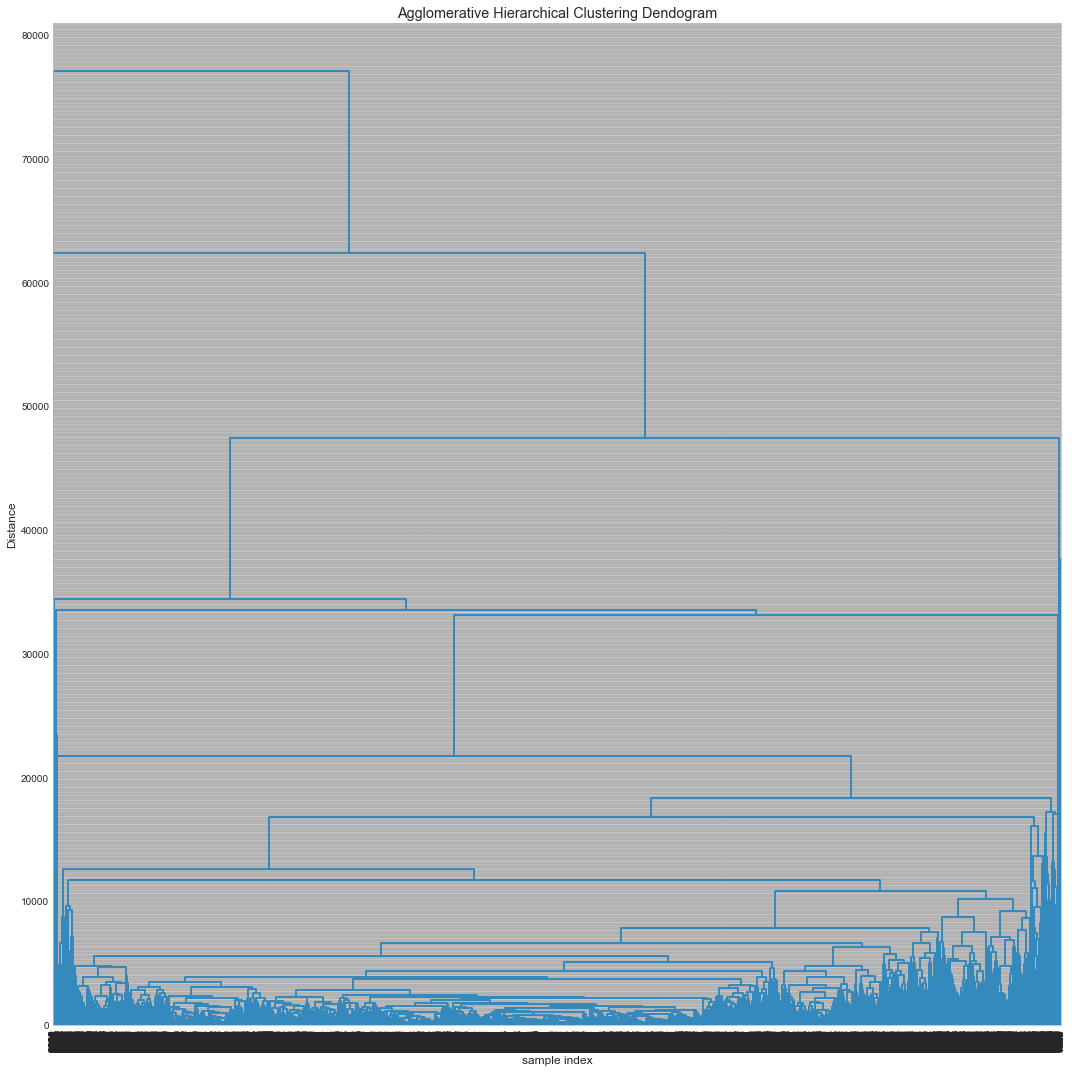

In [38]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_1, leaf_rotation=90.,color_threshold = 1.5, leaf_font_size=10. )
plt.tight_layout()

C:\Users\ybhat\Anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


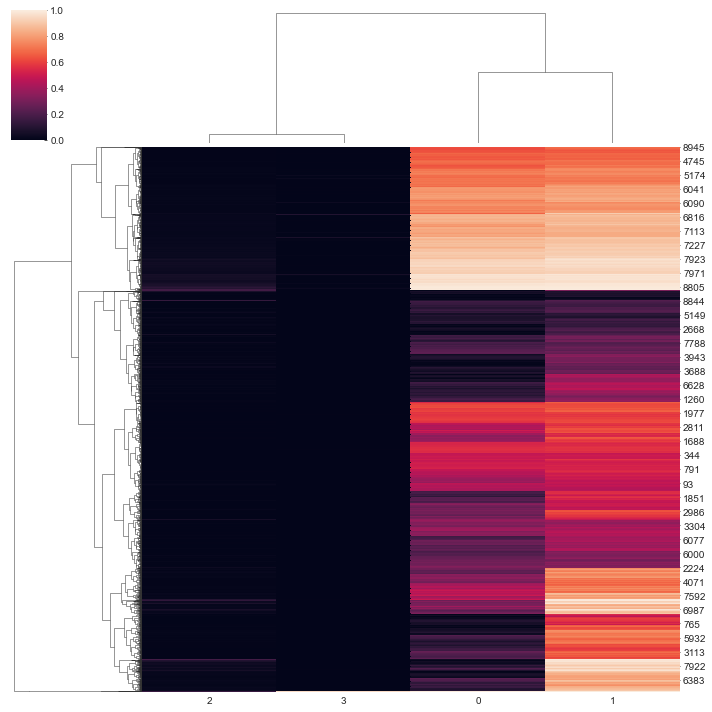

In [39]:
#Making a cluster map
sns.clustermap(Z_1,standard_scale=1)

Case 2: Cluster-2 -- For 'complete'

In [40]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_2 = linkage(df_attr, 'complete')
c_val, coph_dists = cophenet(Z_2 , pdist(df_attr))

c_val

0.7959131950348018

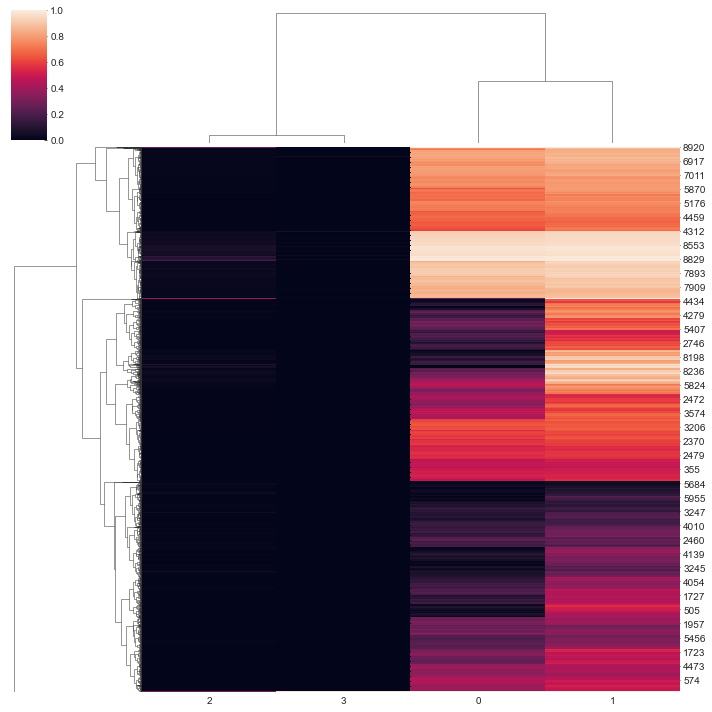

In [41]:
#Making a cluster map
sns.clustermap(Z_2,standard_scale=1)

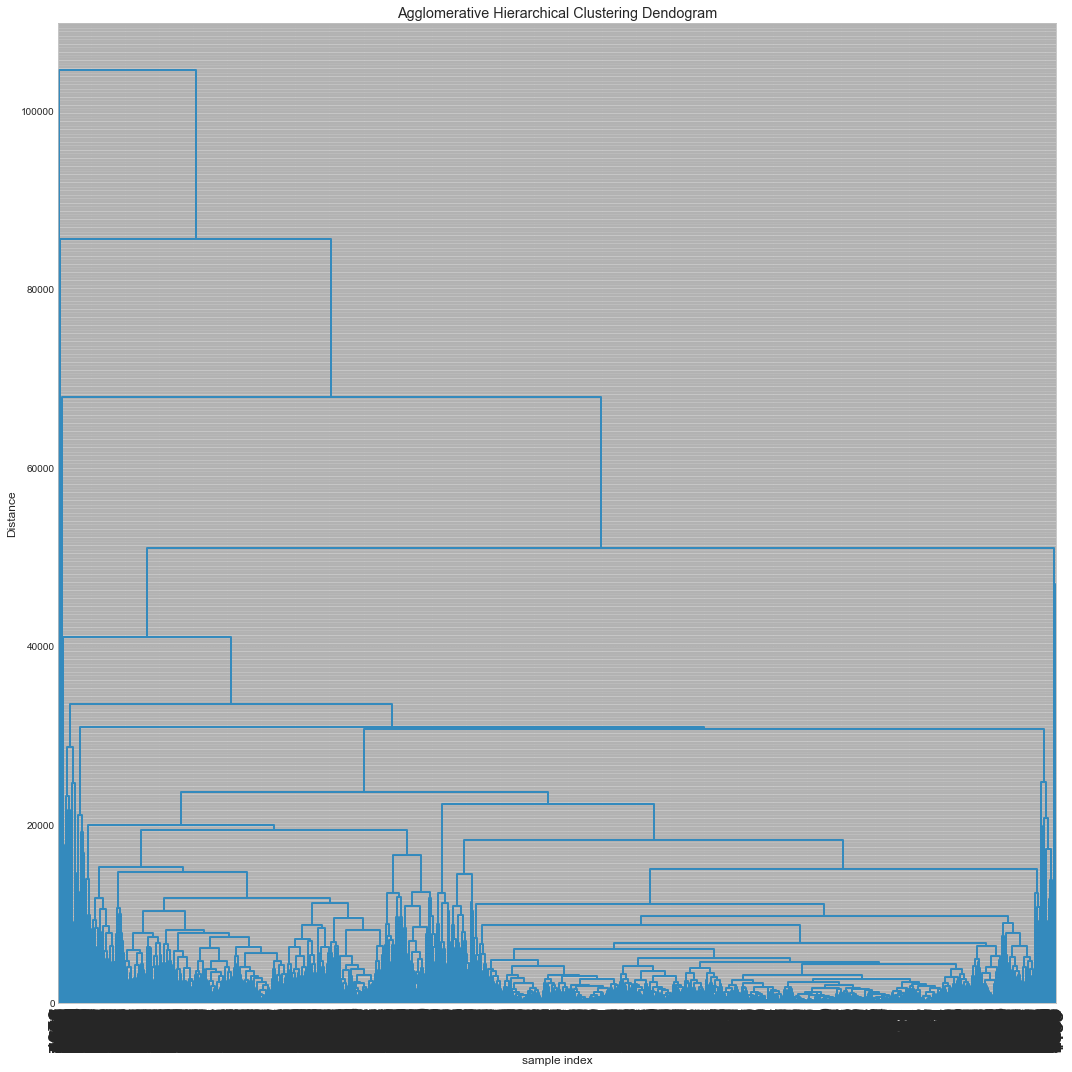

In [42]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_2, leaf_rotation=90.,color_threshold=1.5,  leaf_font_size=20. )
plt.tight_layout()

Case 3: Cluster-3

In [43]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_3 = linkage(df_attr, 'ward')
c_val, coph_dists = cophenet(Z_3 , pdist(df_attr))

c_val

0.4439335563433446

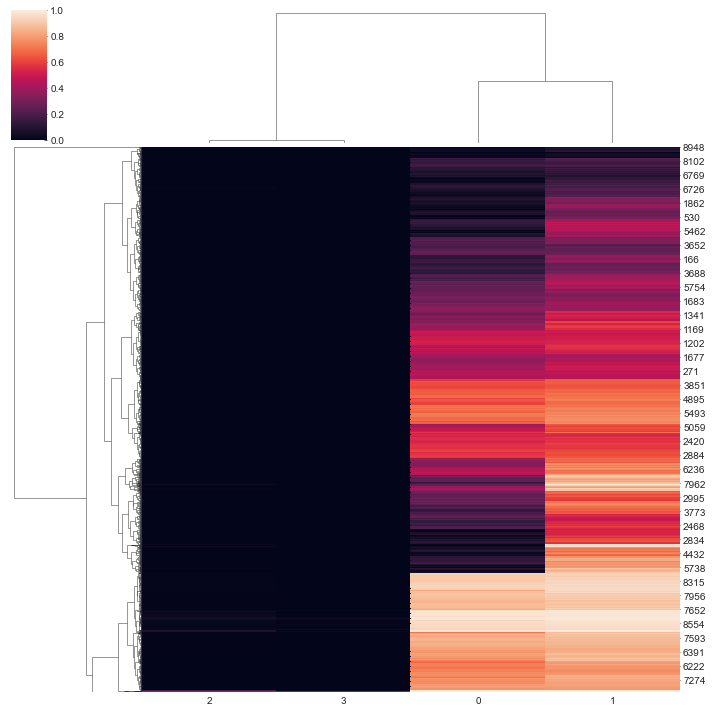

In [44]:
#Making a cluster map
sns.clustermap(Z_3,standard_scale=1)

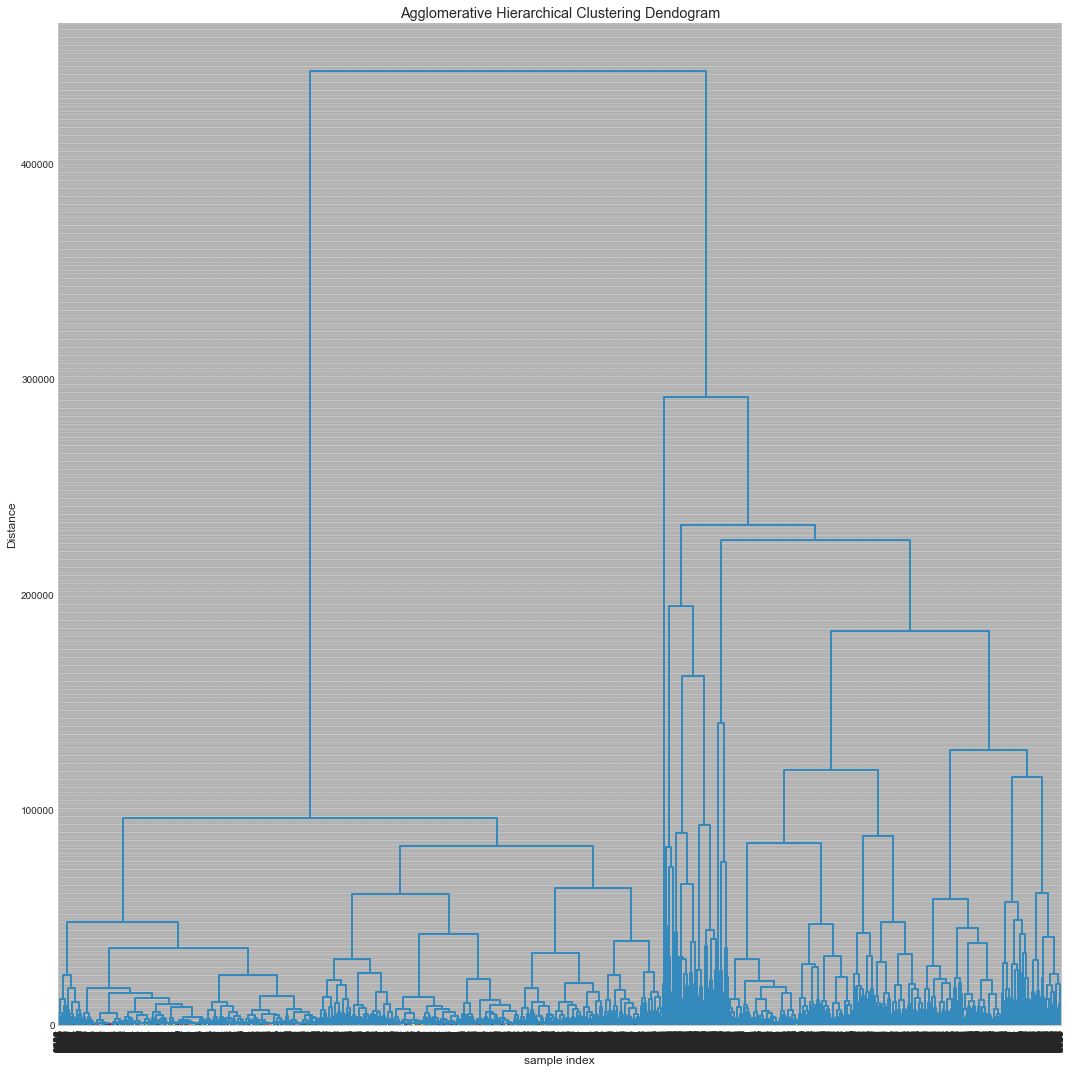

In [45]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_3, leaf_rotation=90.,color_threshold=500,  leaf_font_size=10. )
plt.tight_layout()

As evident from the above analysis:

Cluster 1 does have a higher credit limit(0.92) as compared to the other two(0.795 and 0.44).

____
## Analysis :--

##### Does applying PCA give a better result in comparison to earlier? 

1. Our Inertia and Silhouette have drastically improved when compared to without using PCA
2. PCA drastically improved the performance of our unsupervised K-means algorithm
3. Cluster-1 does have a higher credit limit as compared to the other 2 clusters, this conclusion can be supported from above analysis

#### Conclusion: 
*In future such unsupervised learning techniques can be used in almost every field, retail being one of them. This example shows one such case, such applications when combined with Data Science will give rise to wide variety of applications in the field.*